# Devoir

## Dataset

### Pen-Based Recognition of Handwritten Digits

C'est une collection de 250 caractères par 44 écrivains. 
Pour ceci, ils ont utilisés un écran tactile détecteur de pression de 500 par 500 pixel sur lequel les écrivains ont pu écrire ces caractères.
L'écran renvoie des coordonnées x et y toutes les 100 millisecondes.
Les 10 premiers caractères de chaque écrivains ne sont pas pris en compte.

Sur ces données, ils appliquent une normalisation pour en faire une représentation invariants au translation et distorsions.
Les nouvelles données sont des coordonnées dont les valeurs sont entre 0 et 100. Usuellement, x reste dans cette intervalle car il y a plus de caractères grand que large.

Pour former et tester les classificateurs, il faut représenter les chiffres en tant que vecteurs caractéristiques de longueur constantes.
Ils ont utilisé la technique de rééchantillonnage des points (x_t, y_t).
Ils ont effectué un rééchantillonnage spatial (points régulièrement espacés en longueur d'arc) grâce à une simple interpolation linéaire entre pairs de points.
Les charactères sont ainsi représenté comme une séquence de T points : (x_t, y_t)_{t=1}^T régulièrement espacés dans l'espace en longueur d'arc.

Ainsi le vecteur à une taille de 2*T, 2 fois le nombre de points rééchantillonner.
Ils ont fait un rééchantillonnage spatial avec T=8.

Finalement, le dataset est composé de 16 attributs en entrés de type entiers entre 0 et 100 et de 1 attribut de classe qui le code de classe compris entre 0 et 9.
La cible à prédire est donc un code de classe.
Les données en entrées sont déjà préparés pour appliquer un modèle de machine learning.

	Nombre d'instance et distribution de classe : 
		Training dataset :  7 494 lignes
			Classe:
				0:  780
				1:  779
				2:  780
				3:  719
				4:  780
				5:  720
				6:  720
				7:  778
				8:  719
				9:  719
		
		Test dataset :  3 498 lignes
			Classe:
				0:  363
				1:  364
				2:  364
				3:  336
				4:  364
				5:  335
				6:  336
				7:  364
				8:  336
				9:  336

## Objectifs

 * Prédire le code classe grâce aux 16 attributs qui composent le dataset.

 * Les features n’ont pas de signification seules. Elles doivent être traitées ensemble. C’est donc compliqué de faire une visualisation des données compréhensive. Nous allons pouvoir par exemple montrer la répartition de chaque feature.
 * Le dataset est déjà prêt pour l’utilisation de modèles de machine learning. Il n’y a donc pas de préparation à faire.
 * Nous allons appliqué différents modèles de machine learning, comme le K-NN, Random Forest et du Deep Learning avec Keras.
 * Et enfin nous optimiserons les performances grâces à des courbes ROC et des matrices de corrélations.

# Librairie

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


# Importation des données

In [2]:
data_train = pd.read_csv("../data/pendigits_train.csv", sep =";", encoding="utf-8")
data_train.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [3]:
data_test = pd.read_csv("../data/pendigits_test.csv", sep =";", encoding="utf-8")
data_test.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,Class
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [4]:
data_train.isna().sum()

F_1      0
F_2      0
F_3      0
F_4      0
F_5      0
F_6      0
F_7      0
F_8      0
F_9      0
F_10     0
F_11     0
F_12     0
F_13     0
F_14     0
F_15     0
F_16     0
Class    0
dtype: int64

In [5]:
data_test.isna().sum()

F_1      0
F_2      0
F_3      0
F_4      0
F_5      0
F_6      0
F_7      0
F_8      0
F_9      0
F_10     0
F_11     0
F_12     0
F_13     0
F_14     0
F_15     0
F_16     0
Class    0
dtype: int64

Pas de NA.
Données brutes sans modification à faire

## Fusion des dataset pour la visualisation

In [6]:
data = pd.concat([data_train, data_test])
data.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


# Visualisation des données

## Répartition des classes

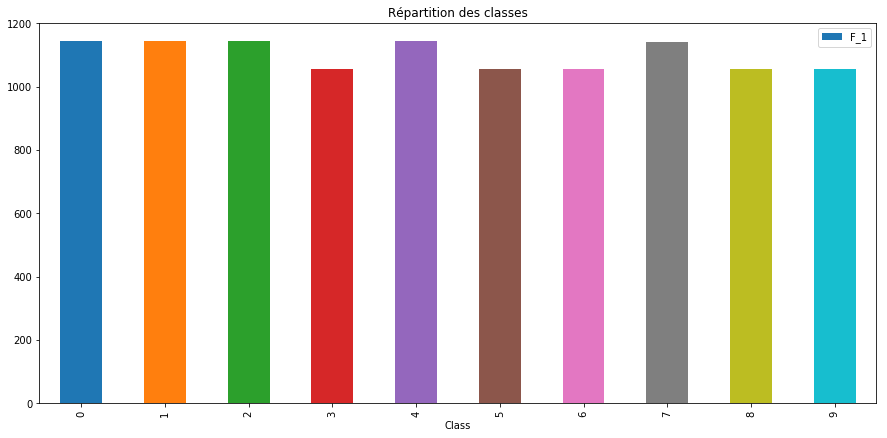

In [7]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Répartition des classes'
data.groupby(['Class']).count()['F_1'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

Ditribution homogènes des classes

## Répartition des valeurs

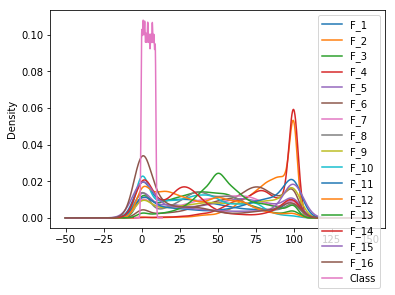

In [8]:
data.plot.kde()

On s'apercoit que les valeurs sont en plus grand nombre aux extrêmes (0 et 100) ainsi qu'au milieu (50).

# Modélisation

In [6]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

## K-NN

### Comparaison de la valeur K

In [7]:
error = []
k_min = 1
k_max = 20

# Calculating error for K values between 1 and 20
for i in range(k_min, k_max):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur K :  3 , précision :  0.978


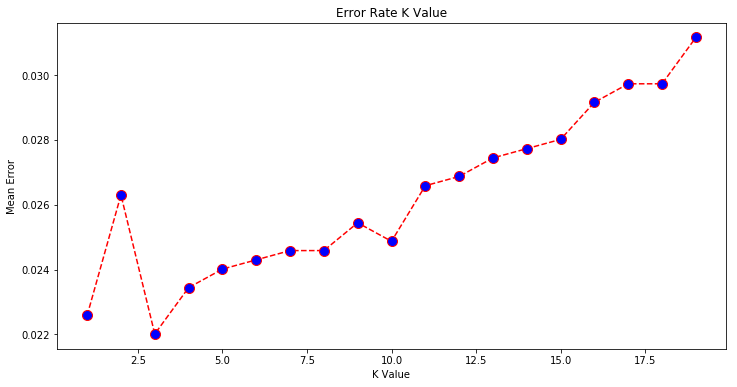

In [8]:
plt.figure(figsize=(12, 6))  
plt.plot(range(k_min, k_max), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

best_k = np.argmin(error) + 1
print("Meilleur K : ", best_k, ", précision : ", 1 - round(min(error), 3))

### Training avec le meilleur K

In [9]:
knn = KNeighborsClassifier(n_neighbors=best_k)  
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Prediction et evaluation

In [10]:
y_pred = knn.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[354   0   0   0   0   0   5   0   3   1]
 [  0 350  11   0   1   0   0   2   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 354  10   0   0   0   0]
 [  0   0   0   5   0 328   0   0   0   2]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  10   1   0   0   0   1 351   1   0]
 [  1   0   0   0   0   1   0   0 334   0]
 [  0   3   0   7   1   1   0   4   1 319]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.97      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       0.99      0.97      0.98       364
           5       0.96      0.98      0.97       335
           6       0.98      1.00      0.99       336
           7       0.98      0.96      0.97       364
           8       0.99      0.99      0.99       336
           9       0.98     

On obtient une précision de 98% ce qui est très bon.

## Random Forest

### Comparaison du parametre n_estimators

In [12]:
error = []
n_min = 1
n_max = 100

for i in range(n_min, n_max):  
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur N :  89 , précision :  0.969


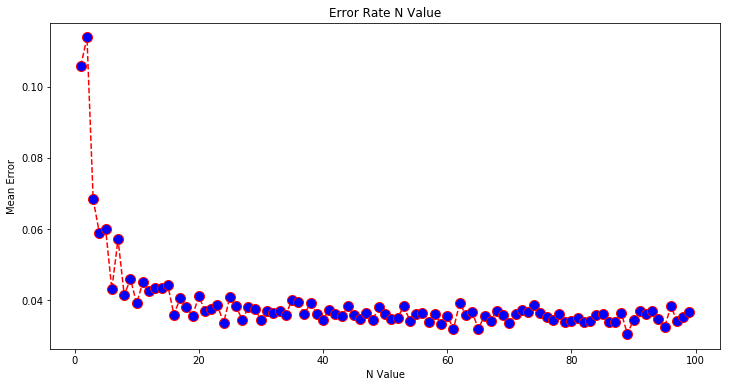

In [13]:
plt.figure(figsize=(12, 6))  
plt.plot(range(n_min, n_max), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate N Value')  
plt.xlabel('N Value')  
plt.ylabel('Mean Error')  

best_n = np.argmin(error) + 1
print("Meilleur N : ", best_n, ", précision : ", 1 - round(min(error), 3))

### Training avec le meilleur n

In [14]:
rf = RandomForestClassifier(n_estimators=best_n)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction et évaluation

In [15]:
y_pred = rf.predict(X_test)

In [16]:
print(round(accuracy_score(y_test, y_pred), 3))

0.968


In [17]:
feature_imp = pd.Series(rf.feature_importances_,index=list(X_train)).sort_values(ascending=False)
feature_imp

F_16    0.109129
F_14    0.099249
F_10    0.078781
F_11    0.077795
F_15    0.073067
F_5     0.066109
F_8     0.063277
F_9     0.062789
F_1     0.056100
F_12    0.055611
F_2     0.054360
F_4     0.052997
F_6     0.049661
F_7     0.043817
F_13    0.031980
F_3     0.025279
dtype: float64

## Deep learning avec Keras

### Model

In [18]:
y_train_keras = np_utils.to_categorical(y_train)
y_test_keras = np_utils.to_categorical(y_test)

In [19]:
model = Sequential()
model.add(Dense(8, input_dim=16, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train_keras, batch_size=128, epochs=1000, validation_data=(X_test, y_test_keras))

Instructions for updating:
Use tf.cast instead.
Train on 7494 samples, validate on 3498 samples
Epoch 1/1000
7494/7494 [==============================] - 1s 149us/step - loss: 11.6053 - acc: 0.2298 - val_loss: 10.2221 - val_acc: 0.3282
Epoch 2/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.9794 - acc: 0.3467 - val_loss: 9.8230 - val_acc: 0.3679
Epoch 3/1000
7494/7494 [==============================] - 0s 37us/step - loss: 9.8001 - acc: 0.3695 - val_loss: 9.7848 - val_acc: 0.3736
Epoch 4/1000
7494/7494 [==============================] - 0s 36us/step - loss: 9.7533 - acc: 0.3783 - val_loss: 9.7512 - val_acc: 0.3816
Epoch 5/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.7371 - acc: 0.3835 - val_loss: 9.7363 - val_acc: 0.3839
Epoch 6/1000
7494/7494 [==============================] - 0s 37us/step - loss: 9.7259 - acc: 0.3840 - val_loss: 9.7271 - val_acc: 0.3836
Epoch 7/1000
7494/7494 [==============================] - 0s 29us/step - loss: 

7494/7494 [==============================] - 0s 33us/step - loss: 9.6699 - acc: 0.3995 - val_loss: 9.6848 - val_acc: 0.3948
Epoch 59/1000
7494/7494 [==============================] - 0s 39us/step - loss: 9.6696 - acc: 0.3995 - val_loss: 9.6834 - val_acc: 0.3957
Epoch 60/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6697 - acc: 0.3997 - val_loss: 9.6825 - val_acc: 0.3962
Epoch 61/1000
7494/7494 [==============================] - 0s 38us/step - loss: 9.6694 - acc: 0.3997 - val_loss: 9.6820 - val_acc: 0.3962
Epoch 62/1000
7494/7494 [==============================] - 0s 40us/step - loss: 9.6694 - acc: 0.3997 - val_loss: 9.6827 - val_acc: 0.3962
Epoch 63/1000
7494/7494 [==============================] - 0s 40us/step - loss: 9.6695 - acc: 0.3994 - val_loss: 9.6916 - val_acc: 0.3925
Epoch 64/1000
7494/7494 [==============================] - 0s 42us/step - loss: 9.6695 - acc: 0.3997 - val_loss: 9.6846 - val_acc: 0.3948
Epoch 65/1000
7494/7494 [=======================

7494/7494 [==============================] - 0s 29us/step - loss: 9.6694 - acc: 0.3997 - val_loss: 9.6795 - val_acc: 0.3982
Epoch 118/1000
7494/7494 [==============================] - 0s 29us/step - loss: 9.6681 - acc: 0.4002 - val_loss: 9.6796 - val_acc: 0.3974
Epoch 119/1000
7494/7494 [==============================] - 0s 28us/step - loss: 9.6683 - acc: 0.4001 - val_loss: 9.6789 - val_acc: 0.3977
Epoch 120/1000
7494/7494 [==============================] - 0s 29us/step - loss: 9.6684 - acc: 0.4001 - val_loss: 9.6792 - val_acc: 0.3977
Epoch 121/1000
7494/7494 [==============================] - 0s 29us/step - loss: 9.6682 - acc: 0.4002 - val_loss: 9.6789 - val_acc: 0.3982
Epoch 122/1000
7494/7494 [==============================] - 0s 29us/step - loss: 9.6682 - acc: 0.4002 - val_loss: 9.6801 - val_acc: 0.3971
Epoch 123/1000
7494/7494 [==============================] - 0s 29us/step - loss: 9.6683 - acc: 0.4002 - val_loss: 9.6798 - val_acc: 0.3977
Epoch 124/1000
7494/7494 [================

7494/7494 [==============================] - 0s 35us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6838 - val_acc: 0.3954
Epoch 177/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6680 - acc: 0.4002 - val_loss: 9.6800 - val_acc: 0.3979
Epoch 178/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6812 - val_acc: 0.3974
Epoch 179/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6680 - acc: 0.4002 - val_loss: 9.6803 - val_acc: 0.3979
Epoch 180/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6802 - val_acc: 0.3979
Epoch 181/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6680 - acc: 0.4002 - val_loss: 9.6795 - val_acc: 0.3979
Epoch 182/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6680 - acc: 0.4002 - val_loss: 9.6797 - val_acc: 0.3982
Epoch 183/1000
7494/7494 [================

7494/7494 [==============================] - 0s 31us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6811 - val_acc: 0.3979
Epoch 236/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6815 - val_acc: 0.3977
Epoch 237/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6679 - acc: 0.4002 - val_loss: 9.6829 - val_acc: 0.3974
Epoch 238/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6706 - acc: 0.3990 - val_loss: 9.6882 - val_acc: 0.3951
Epoch 239/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6699 - acc: 0.3993 - val_loss: 9.6821 - val_acc: 0.3974
Epoch 240/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6680 - acc: 0.4002 - val_loss: 9.6826 - val_acc: 0.3977
Epoch 241/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6658 - acc: 0.4003 - val_loss: 9.6849 - val_acc: 0.3962
Epoch 242/1000
7494/7494 [================

7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6840 - val_acc: 0.3965
Epoch 295/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6844 - val_acc: 0.3968
Epoch 296/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6841 - val_acc: 0.3965
Epoch 297/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6834 - val_acc: 0.3977
Epoch 298/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6846 - val_acc: 0.3968
Epoch 299/1000
7494/7494 [==============================] - 0s 36us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6844 - val_acc: 0.3968
Epoch 300/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6843 - val_acc: 0.3971
Epoch 301/1000
7494/7494 [================

7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6826 - val_acc: 0.3974
Epoch 354/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6826 - val_acc: 0.3974
Epoch 355/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6830 - val_acc: 0.3971
Epoch 356/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6838 - val_acc: 0.3968
Epoch 357/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6829 - val_acc: 0.3974
Epoch 358/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6831 - val_acc: 0.3971
Epoch 359/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6860 - val_acc: 0.3959
Epoch 360/1000
7494/7494 [================

7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6812 - val_acc: 0.3979
Epoch 413/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6812 - val_acc: 0.3979
Epoch 414/1000
7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6813 - val_acc: 0.3977
Epoch 415/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6813 - val_acc: 0.3979
Epoch 416/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6814 - val_acc: 0.3974
Epoch 417/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6813 - val_acc: 0.3979
Epoch 418/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6814 - val_acc: 0.3977
Epoch 419/1000
7494/7494 [================

7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6821 - val_acc: 0.3979
Epoch 472/1000
7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6822 - val_acc: 0.3979
Epoch 473/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6822 - val_acc: 0.3979
Epoch 474/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6822 - val_acc: 0.3979
Epoch 475/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6822 - val_acc: 0.3979
Epoch 476/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6823 - val_acc: 0.3979
Epoch 477/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6823 - val_acc: 0.3979
Epoch 478/1000
7494/7494 [================

7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6839 - val_acc: 0.3971
Epoch 531/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6842 - val_acc: 0.3971
Epoch 532/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6840 - val_acc: 0.3971
Epoch 533/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6837 - val_acc: 0.3974
Epoch 534/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6841 - val_acc: 0.3971
Epoch 535/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6836 - val_acc: 0.3979
Epoch 536/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6839 - val_acc: 0.3971
Epoch 537/1000
7494/7494 [================

7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 590/1000
7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6821 - val_acc: 0.3977
Epoch 591/1000
7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 592/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6821 - val_acc: 0.3977
Epoch 593/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6821 - val_acc: 0.3977
Epoch 594/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6821 - val_acc: 0.3979
Epoch 595/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6822 - val_acc: 0.3977
Epoch 596/1000
7494/7494 [================

7494/7494 [==============================] - 0s 36us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 649/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 650/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 651/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 652/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 653/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 654/1000
7494/7494 [==============================] - 0s 37us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6827 - val_acc: 0.3977
Epoch 655/1000
7494/7494 [================

7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6837 - val_acc: 0.3968
Epoch 708/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6835 - val_acc: 0.3979
Epoch 709/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6841 - val_acc: 0.3979
Epoch 710/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6836 - val_acc: 0.3977
Epoch 711/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6837 - val_acc: 0.3979
Epoch 712/1000
7494/7494 [==============================] - 0s 37us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6841 - val_acc: 0.3979
Epoch 713/1000
7494/7494 [==============================] - 0s 37us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6836 - val_acc: 0.3977
Epoch 714/1000
7494/7494 [================

7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6802 - val_acc: 0.3979
Epoch 767/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6802 - val_acc: 0.3979
Epoch 768/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6802 - val_acc: 0.3979
Epoch 769/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6802 - val_acc: 0.3979
Epoch 770/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6803 - val_acc: 0.3979
Epoch 771/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6803 - val_acc: 0.3979
Epoch 772/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6803 - val_acc: 0.3979
Epoch 773/1000
7494/7494 [================

7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6812 - val_acc: 0.3979
Epoch 826/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6813 - val_acc: 0.3979
Epoch 827/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6814 - val_acc: 0.3979
Epoch 828/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6815 - val_acc: 0.3979
Epoch 829/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6816 - val_acc: 0.3979
Epoch 830/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6815 - val_acc: 0.3979
Epoch 831/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6815 - val_acc: 0.3979
Epoch 832/1000
7494/7494 [================

7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6832 - val_acc: 0.3968
Epoch 885/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6831 - val_acc: 0.3968
Epoch 886/1000
7494/7494 [==============================] - 0s 30us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6831 - val_acc: 0.3968
Epoch 887/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6830 - val_acc: 0.3968
Epoch 888/1000
7494/7494 [==============================] - 0s 33us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6830 - val_acc: 0.3968
Epoch 889/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6830 - val_acc: 0.3968
Epoch 890/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6829 - val_acc: 0.3968
Epoch 891/1000
7494/7494 [================

7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3977
Epoch 944/1000
7494/7494 [==============================] - 0s 34us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3977
Epoch 945/1000
7494/7494 [==============================] - 0s 35us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 946/1000
7494/7494 [==============================] - 0s 40us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 947/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 948/1000
7494/7494 [==============================] - 0s 32us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 949/1000
7494/7494 [==============================] - 0s 31us/step - loss: 9.6657 - acc: 0.4003 - val_loss: 9.6820 - val_acc: 0.3979
Epoch 950/1000
7494/7494 [================

### Prediction et evaluation

In [25]:
model.evaluate(X_test, y_test_keras, verbose=0)

[9.68361232892795, 0.3970840480444839]